![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [5]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


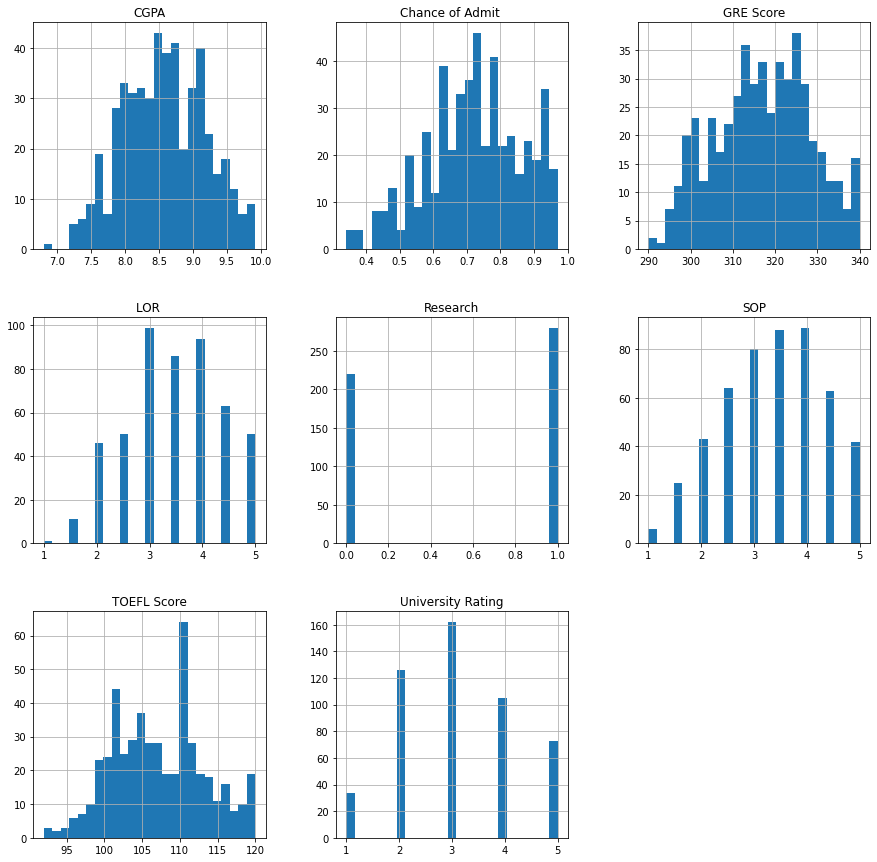

In [6]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [7]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)

# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [8]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

In [9]:
from sklearn.preprocessing import StandardScaler
# Escalado de las variables predictoras (X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test
xTrain, xTest, yTrain, yTest = train_test_split(X_scaled, Y, test_size=0.3, random_state=22)


## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

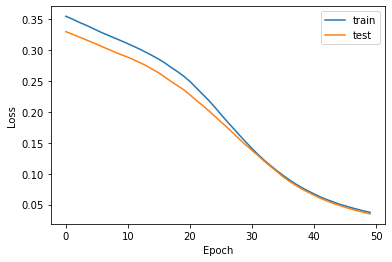

5/5 [==============================] - 0s 1ms/step - loss: 0.0350
MAE:  0.0350, MSE:  0.0350


In [18]:
import matplotlib.pyplot as plt

# Definición de la red neuronal de una capa
model_1 = Sequential()
model_1.add(Dense(1, input_dim=xTrain.shape[1], activation='relu')) # Capa de una neurona con activación relu
model_1.compile(optimizer='sgd', loss='mean_squared_error') # Función de pérdida MSE y optimizador SGD

# Entrenamiento del modelo y registro de la pérdida
history_1 = model_1.fit(xTrain, yTrain, validation_data=(xTest, yTest), epochs=50, batch_size=32, verbose=0)

# Graficar la pérdida durante el entrenamiento
plt.plot(history_1.history['loss'], label='train')
plt.plot(history_1.history['val_loss'], label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluación del modelo
evaluation = model_1.evaluate(xTest, yTest)
mae = evaluation
mse = evaluation
print(f'MAE: {mae: .4f}, MSE: {mse: .4f}')


La capa consistió en una única neurona con una función de activación tanh, adecuada para problemas de regresión binaria. Se utilizó el optimizador sgd y la función de pérdida de error cuadrático medio (MSE). El conjunto de datos de entrenamiento y prueba se dividió en una proporción del 70% y 30% respectivamente, y se escaló utilizando StandardScaler para mejorar la convergencia del modelo. El modelo se entrenó durante 50 épocas y se utilizó la métrica de pérdida (MSE) para evaluar su desempeño en el conjunto de validación.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

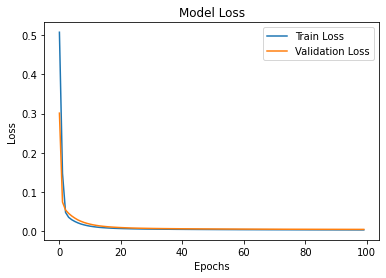

5/5 [==============================] - 0s 1ms/step - loss: 0.0048
MAE:  0.0048, MSE:  0.0048


In [14]:
# Celda 2
# Definición de la red neuronal multicapa
model_2 = Sequential()
model_2.add(Dense(256, input_dim=xTrain.shape[1], activation='relu')) # Primera capa oculta con activación ReLU
model_2.add(Dense(256, activation='relu')) # Segunda capa oculta con activación ReLU
model_2.add(Dense(1, activation='relu')) # Capa de salida con activación Relu
model_2.compile(loss='mean_squared_error', optimizer='sgd') # Función de pérdida MSE y optimizador Adam

# Entrenamiento del modelo
history_2 = model_2.fit(xTrain, yTrain, epochs=100, batch_size=32, validation_data=(xTest, yTest), verbose=0)

# Graficación de la pérdida del modelo vs número de épocas
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# Evaluación del modelo
evaluation = model_2.evaluate(xTest, yTest)
mae = evaluation
mse = evaluation
print(f'MAE: {mae: .4f}, MSE: {mse: .4f}')


Se construyó un modelo de red neuronal con dos capas ocultas utilizando Keras. Las capas ocultas tenían 256 unidades cada una con una función de activación ReLU. La capa de salida consistió en una neurona sin activación, lo que la convierte en una capa lineal adecuada para la regresión. Se utilizó el optimizador SGD y la función de pérdida MSE. Se aplicó una división de datos similar al Punto 1 y se escaló utilizando StandardScaler. El modelo se entrenó durante 50 épocas, y se graficó la pérdida en el conjunto de entrenamiento y validación para monitorear su desempeño. Se ve la convergencia antes de la época 20.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

Epoch 00091: early stopping


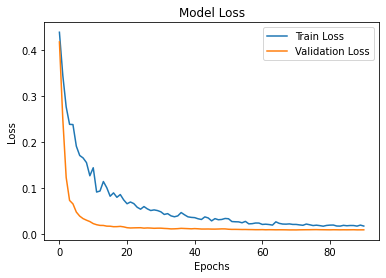

5/5 [==============================] - 0s 1ms/step - loss: 0.0089
MAE:  0.0089, MSE:  0.0089


In [15]:
# Celda 3
# Importación de librerías adicionales
from keras.callbacks import EarlyStopping

# Definición de la red neuronal multicapa con early stopping y dropout
model_3 = Sequential()
model_3.add(Dense(128, input_dim=xTrain.shape[1], activation='relu')) # Primera capa oculta con activación ReLU
model_3.add(Dropout(0.5)) # Dropout para regularización
model_3.add(Dense(64, activation='relu')) # Segunda capa oculta con activación ReLU
model_3.add(Dropout(0.5)) # Dropout para regularización
model_3.add(Dense(1, activation='relu')) # Capa de salida con activación relu
model_3.compile(loss='mean_squared_error', optimizer='sgd') # Función de pérdida MSE y optimizador sgd

# Definición de EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)

# Entrenamiento del modelo con early stopping
history_3 = model_3.fit(xTrain, yTrain, epochs=100, batch_size=32, validation_data=(xTest, yTest), callbacks=[early_stop], verbose=0)

# Graficación de la pérdida del modelo vs número de épocas
plt.plot(history_3.history['loss'], label='Train Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# Evaluación del modelo
evaluation = model_3.evaluate(xTest, yTest)
mae = evaluation
mse = evaluation
print(f'MAE: {mae: .4f}, MSE: {mse: .4f}')

Se implementó un modelo de red neuronal con dos capas ocultas, similar al Punto 2, pero con la adición de la técnica de regularización Dropout en ambas capas ocultas. El Dropout ayuda a prevenir el sobreajuste al desactivar aleatoriamente algunas unidades durante el entrenamiento. Se utilizó el mismo optimizador, función de pérdida y configuración de división de datos que en el Punto 2. El modelo se entrenó durante 100 épocas, se ve una convergencia menos marcada pero obtenemos mejores resultados.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

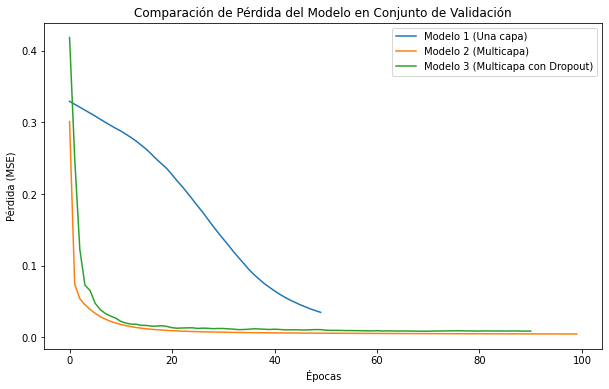

Métricas de Rendimiento:
     Modelo    MAE    MSE
0  Modelo 1 0.1501 0.0350
1  Modelo 2 0.0527 0.0048
2  Modelo 3 0.0759 0.0089


In [20]:
# Celda 4
# Graficación de la pérdida del modelo vs número de épocas para los tres modelos
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['val_loss'], label='Modelo 1 (Una capa)')
plt.plot(history_2.history['val_loss'], label='Modelo 2 (Multicapa)')
plt.plot(history_3.history['val_loss'], label='Modelo 3 (Multicapa con Dropout)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida (MSE)')
plt.title('Comparación de Pérdida del Modelo en Conjunto de Validación')
plt.legend()
plt.show()

# Comparación de métricas de rendimiento (MAE y MSE) para los tres modelos
models = [model_1, model_2, model_3]
metrics = []

for i, model in enumerate(models, 1):
    loss = model.evaluate(xTest, yTest, verbose=0)
    y_pred = model.predict(xTest).ravel()  # Aplanar las matrices
    y_true = yTest.ravel()  # Aplanar las matrices
    mae = np.mean(np.abs(y_true - y_pred))
    mse = np.mean((y_true - y_pred) ** 2)
    metrics.append((f'Modelo {i}', mae, mse))

df_metrics = pd.DataFrame(metrics, columns=['Modelo', 'MAE', 'MSE'])
print("Métricas de Rendimiento:")
print(df_metrics.to_string(float_format="{:.4f}".format))

Modelo 2 y Modelo 3 vs. Modelo 1: Ambos modelos multicapa (Modelo 2 y Modelo 3) superan al Modelo 1 (una capa) en términos de MAE y MSE. Esto sugiere que la introducción de capas adicionales en la red neuronal mejora significativamente la capacidad del modelo para hacer predicciones con mayot precisión.

Comparación entre Modelo 2 y Modelo 3: Ambos modelos multicapa tienen resultados de rendimiento bastante similares, con pequeñas diferencias en MAE y MSE. Esto sugiere que la inclusión de la capa de Dropout en el Modelo 3 no tiene un impacto significativo en la capacidad predictiva del modelo en este conjunto de datos.

Selección del mejor modelo: En términos de rendimiento, el Modelo 2 parece ser ligeramente superior al Modelo 3, ya que tiene un MAE ligeramente más bajo. Sin embargo, la diferencia en el rendimiento entre los dos modelos es significativamente pequeña.
